## [0] 신경망층 다시 확인

In [106]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. 데이터 준비
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])   # 입력
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])   # 정답 (y = 2x)

model = nn.Linear(1, 1)  # 2. 모델 정의 (Linear: y = wx + b)

# 3. 손실 함수와 옵티마이저 정의
criterion = nn.MSELoss()                           # 평균제곱오차
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 확률적 경사하강법

# 4. 학습 루프
for epoch in range(10):

    y_pred = model(x)    # (1) 순전파 - 예측
    loss = criterion(y_pred, y)   # (2) 손실 계산
    optimizer.zero_grad()   # (3) 기울기 초기화 (이전 값 누적 방지)
    loss.backward() # (4) 역전파 - 기울기 계산
    optimizer.step() # (5) 옵티마이저로 가중치 업데이트
    # 로그 출력
    print(f"Epoch {epoch+1}: loss={loss.item():.4f}")

# 5. 최종 결과 확인
print("\n학습 후 가중치, 절편:")
print("w =", model.weight.item())
print("b =", model.bias.item())


Epoch 1: loss=52.2354
Epoch 2: loss=36.3629
Epoch 3: loss=25.3485
Epoch 4: loss=17.7052
Epoch 5: loss=12.4010
Epoch 6: loss=8.7198
Epoch 7: loss=6.1648
Epoch 8: loss=4.3913
Epoch 9: loss=3.1600
Epoch 10: loss=2.3049

학습 후 가중치, 절편:
w = 1.1145458221435547
b = 1.3586926460266113


## [1] 신경망의 완전연결층이란

### [1-1] 이미지데이터의 채널과 0-255 숫자이해

(4, 4, 3)


array([[[148,  63, 211],
        [ 33, 158, 182],
        [232,  46,  26],
        [240, 102,  51]],

       [[ 87,  80, 155],
        [162, 193,  12],
        [143, 139,  54],
        [148, 137, 201]],

       [[ 27,  53, 173],
        [169, 192, 242],
        [ 50,  29, 211],
        [173, 114, 112]],

       [[ 35, 138,  50],
        [ 25,  77,  91],
        [144,  90, 141],
        [ 38, 153, 162]]])

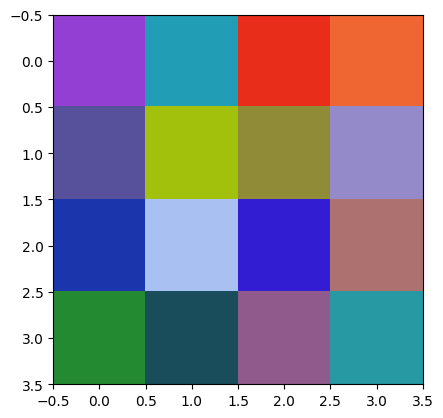

In [70]:
import numpy as np
img=[[[148,63,211], [ 33,158,182],[232,46,26],[240,102,51]],
     [[ 87,80,155], [162,193,12],[143,139,54],[148,137,201]],
     [[ 27,53,173], [169,192,242], [50,29,211], [173,114,112]],
      [[ 35,138,50], [ 25,77,91], [144,90,141],[38,153,162]]]
import numpy as np
imgArray=np.array(img)
print(imgArray.shape)
plt.imshow(imgArray)

imgArray

### [1-2] pytorch용 입력용으로 변환
- torch의 transforms 를 이용한 변환
  - H,W,C -> C,H,W로 변환
  - 데이터스케일링등 다양한 변환요소가 있음.(11.12일부터 강의내용임)

In [95]:
import torch
import torchvision.transforms.v2 as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data



transform = transforms.Compose([
    transforms.ToImage(),
    transforms.ToDtype(torch.float32, scale=True)
])

input_tensor_chw = transform(imgArray)
print(input_tensor_chw.shape)
print(input_tensor_chw)


torch.Size([3, 4, 4])
Image([[[1.6046e-17, 3.5779e-18, 2.5153e-17, 2.6021e-17],
        [9.4326e-18, 1.7564e-17, 1.5504e-17, 1.6046e-17],
        [2.9273e-18, 1.8323e-17, 5.4210e-18, 1.8757e-17],
        [3.7947e-18, 2.7105e-18, 1.5613e-17, 4.1200e-18]],

       [[6.8305e-18, 1.7130e-17, 4.9873e-18, 1.1059e-17],
        [8.6736e-18, 2.0925e-17, 1.5070e-17, 1.4854e-17],
        [5.7463e-18, 2.0817e-17, 3.1442e-18, 1.2360e-17],
        [1.4962e-17, 8.3484e-18, 9.7578e-18, 1.6588e-17]],

       [[2.2877e-17, 1.9732e-17, 2.8189e-18, 5.5294e-18],
        [1.6805e-17, 1.3010e-18, 5.8547e-18, 2.1792e-17],
        [1.8757e-17, 2.6238e-17, 2.2877e-17, 1.2143e-17],
        [5.4210e-18, 9.8662e-18, 1.5287e-17, 1.7564e-17]]], )


### [1-3] 모델 학습에 사용될수 있는 Batch,C,H,W로 변환

In [96]:
input_tensor_bchw = input_tensor_chw.unsqueeze(0)
print(input_tensor_bchw.shape)
input_tensor_bchw

torch.Size([1, 3, 4, 4])


tensor([[[[1.6046e-17, 3.5779e-18, 2.5153e-17, 2.6021e-17],
          [9.4326e-18, 1.7564e-17, 1.5504e-17, 1.6046e-17],
          [2.9273e-18, 1.8323e-17, 5.4210e-18, 1.8757e-17],
          [3.7947e-18, 2.7105e-18, 1.5613e-17, 4.1200e-18]],

         [[6.8305e-18, 1.7130e-17, 4.9873e-18, 1.1059e-17],
          [8.6736e-18, 2.0925e-17, 1.5070e-17, 1.4854e-17],
          [5.7463e-18, 2.0817e-17, 3.1442e-18, 1.2360e-17],
          [1.4962e-17, 8.3484e-18, 9.7578e-18, 1.6588e-17]],

         [[2.2877e-17, 1.9732e-17, 2.8189e-18, 5.5294e-18],
          [1.6805e-17, 1.3010e-18, 5.8547e-18, 2.1792e-17],
          [1.8757e-17, 2.6238e-17, 2.2877e-17, 1.2143e-17],
          [5.4210e-18, 9.8662e-18, 1.5287e-17, 1.7564e-17]]]])

In [100]:
###############################
# 데이터 로더기로 변환함
##############################3
import torch.utils.data as data

print(input_tensor_chw.shape)
y_label=2 #라벨 2라고 가정하고
dataset = [(input_tensor_chw, torch.tensor(y_label))]
data_loader = data.DataLoader(dataset, batch_size=1, shuffle=False)
for images, labels in data_loader:
  print(images.shape)

torch.Size([3, 4, 4])
torch.Size([1, 3, 4, 4])


### [1-4] 모델 제작 및 훈련

In [101]:

class SimpleFCN(nn.Module):
    def __init__(self):
        super(SimpleFCN, self).__init__()

        input_features = 4 * 4 * 3

        self.fc1 = nn.Linear(in_features=input_features, out_features=2)
        self.fc2 = nn.Linear(in_features=2, out_features=3)

    def forward(self, x):
        x = x.view(-1, 4 * 4 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

In [104]:
model = SimpleFCN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

NUM_EPOCHS=2
for epoch in range(NUM_EPOCHS):
    for i, (inputs, targets) in enumerate(data_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        print(f"[Epoch {epoch+1}/{NUM_EPOCHS}, Step {i+1}] Loss: {loss.item():.6f}")

print(" 학습 완료! ")

[Epoch 1/2, Step 1] Loss: 0.644446
[Epoch 2/2, Step 1] Loss: 0.640309
 학습 완료! 


## [2] 합성곱 필터의 이해

### [2-1] openCV이미지 필터

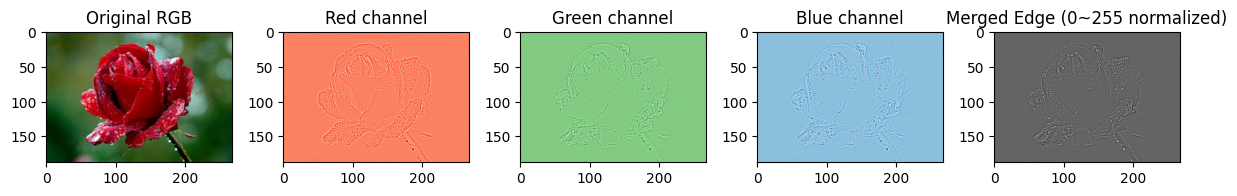

In [129]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ---------------------------------------------------
#  RGB 원본 데이터 (4x4x3 샘플)
# ---------------------------------------------------
img = [[[148,63,211], [33,158,182],[232,46,26],[240,102,51]],
       [[87,80,155], [162,193,12],[143,139,54],[148,137,201]],
       [[27,53,173], [169,192,242],[50,29,211],[173,114,112]],
       [[35,138,50], [25,77,91],[144,90,141],[38,153,162]]]

# 외부 이미지로 바꾸고 싶다면 주석 해제:
img = Image.open('rose.jpg')

# ---------------------------------------------------
#  float32 변환 (0~255 스케일 유지)
# ---------------------------------------------------
imgArray = np.array(img, dtype=np.float32)

# ---------------------------------------------------
#  RGB 채널 분리
# ---------------------------------------------------
r, g, b = imgArray[:,:,0], imgArray[:,:,1], imgArray[:,:,2]

# ---------------------------------------------------
#  엣지 필터 (Laplacian 계열)
# ---------------------------------------------------
kernel = np.array([[-1,-1,-1],
                   [-1, 8,-1],
                   [-1,-1,-1]], dtype=np.float32)

r_edge = cv2.filter2D(r, -1, kernel)
g_edge = cv2.filter2D(g, -1, kernel)
b_edge = cv2.filter2D(b, -1, kernel)

# ---------------------------------------------------
#  채널별 결과 평균 (PyTorch Conv2d와 동일)
# ---------------------------------------------------
merged_edge = (r_edge + g_edge + b_edge) / 3.0

# ---------------------------------------------------
# 0~255 정규화 (PyTorch 스케일과 완전 일치)
# ---------------------------------------------------
merged_edge = merged_edge - merged_edge.min()
merged_edge = merged_edge / merged_edge.max() * 255
merged_edge = merged_edge.astype(np.uint8)

# ---------------------------------------------------
#  시각화
# ---------------------------------------------------
plt.figure(figsize=(12,3))

plt.subplot(1,5,1)
plt.imshow(imgArray / 255.0)  # float → 0~1 스케일로 표시
plt.title('Original RGB')

plt.subplot(1,5,2)
plt.imshow(r_edge, cmap='Reds')
plt.title('Red channel')

plt.subplot(1,5,3)
plt.imshow(g_edge, cmap='Greens')
plt.title('Green channel')

plt.subplot(1,5,4)
plt.imshow(b_edge, cmap='Blues')
plt.title('Blue channel')

plt.subplot(1,5,5)
plt.imshow(merged_edge, cmap='gray', vmin=0, vmax=255)
plt.title('Merged Edge (0~255 normalized)')

plt.tight_layout()
plt.show()


### [2-2] pytorch 이미지 필터

입력 텐서: torch.Size([1, 3, 188, 268]) 0.0 255.0


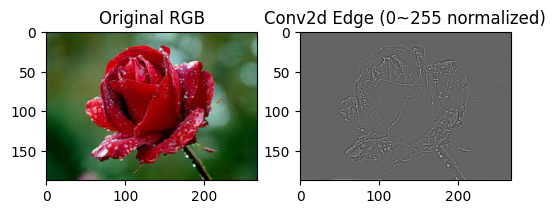

In [130]:
import torch
import torch.nn as nn
import torchvision.transforms.v2 as T
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
#  원본 RGB 데이터
# -----------------------------
img = [[[148,63,211], [33,158,182],[232,46,26],[240,102,51]],
       [[87,80,155], [162,193,12],[143,139,54],[148,137,201]],
       [[27,53,173], [169,192,242],[50,29,211],[173,114,112]],
       [[35,138,50], [25,77,91],[144,90,141],[38,153,162]]]

# 외부 이미지로 바꾸고 싶다면 주석 해제:
img = Image.open('rose.jpg')
img_np = np.array(img, dtype=np.uint8)

# -----------------------------
#  v2 Transform으로 정규화 및 텐서 변환
# -----------------------------
transform = T.Compose([
    T.ToImage(),           # numpy → Image
    T.ToDtype(torch.float32, scale=True),  # 0~1 float으로 스케일링
    T.Lambda(lambda x: x * 255.0),         # 다시 0~255로 확장 (OpenCV scale 맞춤)
])

x = transform(img_np).unsqueeze(0)  # shape: (1, 3, 4, 4)
print("입력 텐서:", x.shape, x.min().item(), x.max().item())

# -----------------------------
#  Conv2d 정의 (padding=1)
# -----------------------------
conv = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, bias=False, padding=1)

kernel = torch.tensor([[-1., -1., -1.],
                       [-1.,  8., -1.],
                       [-1., -1., -1.]])

with torch.no_grad():
    conv.weight[:] = kernel.repeat(3,1,1).unsqueeze(0) / 3  # 3채널 평균

# -----------------------------
#  Forward (합성곱)
# -----------------------------
out = conv(x)

# -----------------------------
#  0~255 정규화
# -----------------------------
out_min, out_max = out.min(), out.max()
out_norm = (out - out_min) / (out_max - out_min) * 255
out_uint8 = out_norm.squeeze().detach().numpy().astype(np.uint8)

# -----------------------------
#  시각화
# -----------------------------
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img_np)
plt.title("Original RGB")

plt.subplot(1,2,2)
plt.imshow(out_uint8, cmap='gray', vmin=0, vmax=255)
plt.title("Conv2d Edge (0~255 normalized)")
plt.show()


## [3] fashion_mnist를 이용한 pytorch CNN_ 특징맵

In [132]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# -----------------------------
# 데이터 준비 (Fashion-MNIST)
# -----------------------------
transform = transforms.Compose([
    transforms.ToTensor()
])

dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

In [133]:
# 샘플 하나 선택
img, label = dataset[12]
x = img.unsqueeze(0)  # (1,1,28,28)
print("클래스:", dataset.classes[label])


클래스: Sneaker


In [135]:
# -----------------------------
# 신경망 구성 (Conv 레이어 여러 개)
# -----------------------------
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 4, 3, padding=1)   # 1채널 → 4채널
        self.conv2 = nn.Conv2d(4, 8, 3, padding=1)   # 4채널 → 8채널
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
    def forward(self, x):
        x1 = self.relu(self.conv1(x))    # conv1 출력
        x2 = self.pool(self.relu(self.conv2(x1)))  # conv2 출력 (pool 포함)
        return x1, x2

model = SimpleCNN()

# -----------------------------
#  순전파 (feature map 얻기)
# -----------------------------
with torch.no_grad():
    f1, f2 = model(x)

print("conv1 feature shape:", f1.shape)  # (1,4,28,28)
print("conv2 feature shape:", f2.shape)  # (1,8,14,14)


conv1 feature shape: torch.Size([1, 4, 28, 28])
conv2 feature shape: torch.Size([1, 8, 14, 14])


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

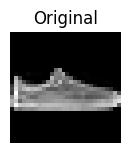

In [136]:
# -----------------------------
#  시각화
# -----------------------------
plt.figure(figsize=(10,4))
plt.subplot(2,6,1)
plt.imshow(img.squeeze(), cmap='gray')
plt.title("Original")
plt.axis('off')


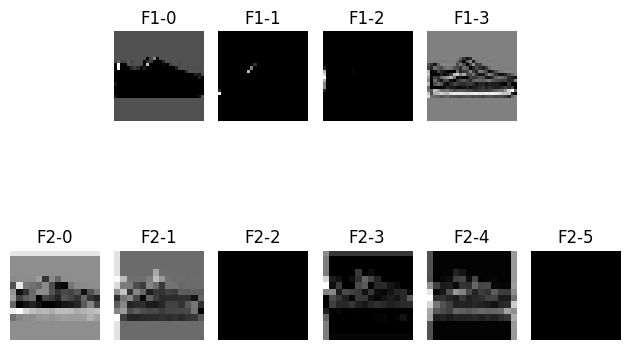

In [137]:
# 첫 번째 Conv 레이어의 4개 feature map
for i in range(4):
    plt.subplot(2,6,i+2)
    plt.imshow(f1[0,i].numpy(), cmap='gray')
    plt.title(f"F1-{i}")
    plt.axis('off')

# 두 번째 Conv 레이어의 8개 feature map 중 6개만 표시
for i in range(6):
    plt.subplot(2,6,7+i)
    plt.imshow(f2[0,i].numpy(), cmap='gray')
    plt.title(f"F2-{i}")
    plt.axis('off')

plt.tight_layout()
plt.show()